In [635]:
#conda install pytorch torchvision 

In [636]:
import torch
import random
import warnings
import pandas as pd
import numpy as np
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [637]:
#Defining the file paths
file1 = 'Dataset/Food trade indicators - FAOSTAT_data_en_2-22-2024.csv'
file2 = 'Dataset/Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv'
file3 = 'Dataset/Crops production indicators - FAOSTAT_data_en_2-22-2024.csv'
file4 = 'Dataset/Emissions - FAOSTAT_data_en_2-27-2024.csv'
file5 = 'Dataset/Employment - FAOSTAT_data_en_2-27-2024.csv'
file6 = 'Dataset/Exchange rate - FAOSTAT_data_en_2-22-2024.csv'
file7 = 'Dataset/Fertilizers use - FAOSTAT_data_en_2-27-2024.csv'
file8 = 'Dataset/Food balances indicators - FAOSTAT_data_en_2-22-2024.csv'
file9 = 'Dataset/Food security indicators  - FAOSTAT_data_en_2-22-2024.csv'
file10 = 'Dataset/Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv'
file11 = 'Dataset/Land temperature change - FAOSTAT_data_en_2-27-2024.csv'
file12 = 'Dataset/Land use - FAOSTAT_data_en_2-22-2024.csv'
file13 = 'Dataset/Pesticides use - FAOSTAT_data_en_2-27-2024.csv'

# Feature

## Feature Extraction

### File 1: Food Trade Indicators

In [638]:
#Default Feature: Area, Year
#Taget Feature: Import Value, Export Value 
#Units: (1000 USD)

df1_raw = pd.read_csv(file1)

#extracting 'Export Value'
export_df = df1_raw[df1_raw["Element"] == "Export Value"]

#summing over all the items to get total export value for each year for each Area
export_df = export_df.groupby(["Area","Year"], as_index=False).Value.sum()
export_df.rename(columns={'Value': 'Export_Value'},inplace = True)

#extracting 'Import Value'
import_df = df1_raw[df1_raw["Element"] == "Import Value"]

#summing over all the items to get total import value for each year for each Area
import_df = import_df.groupby(["Area","Year"], as_index=False).Value.sum()
import_df.rename(columns={'Value': 'Import_Value'},inplace = True)

#merging them both together
df1 = pd.merge(export_df, import_df, on=['Area', 'Year'],how='outer')

#checking number of nan in the preprocessed data
rows_with_nan = df1[df1.isna().any(axis=1)]
print(f'Number of samples with missing values: {len(rows_with_nan)}')

#cheching data information
df1.info()

#deleting unused dataframes
del df1_raw

Number of samples with missing values: 24
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6205 entries, 0 to 6204
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          6205 non-null   object 
 1   Year          6205 non-null   int64  
 2   Export_Value  6181 non-null   float64
 3   Import_Value  6205 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 242.4+ KB


### File 2: Consumer Prices Indicators

In [639]:
#Default Feature: Area, Year
#Taget Feature:Consumer Price Indices, Food Price Inflation
#Unit: N/A

df2_raw = pd.read_csv(file2)

#extracting 'Consumer Price Indices' with item code of 23013
indices_df = df2_raw[df2_raw["Item Code"] == 23013]

#taking the average over 12 months to get value for each year for each area
indices_df = indices_df.groupby(["Area","Year"], as_index=False).Value.mean()
indices_df.rename(columns={'Value': 'Consumer_Price_Indices'}, inplace = True)

#extracting 'Food Price Inflation' with item code of 23014
inflation_df = df2_raw[df2_raw["Item Code"] == 23014]

#taking the average over 12 months to get value for each year for each area
inflation_df = inflation_df.groupby(["Area","Year"], as_index=False).Value.mean()
inflation_df.rename(columns={'Value': 'Price_Inflation'}, inplace = True)

#merging them together
df2 = pd.merge(indices_df, inflation_df, on=['Area', 'Year'], how='outer')

#checking number of nan in the preprocessed data
rows_with_nan = df2[df2.isna().any(axis=1)]
print(f'Number of samples with missing values: {len(rows_with_nan)}')

#cheching data information
df2.info()

#deleting unused dataframes
del df2_raw

Number of samples with missing values: 203
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4856 entries, 0 to 4855
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    4856 non-null   object 
 1   Year                    4856 non-null   int64  
 2   Consumer_Price_Indices  4856 non-null   float64
 3   Price_Inflation         4653 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 189.7+ KB


### File 3: Crops Production Indicators

In [640]:
#Default Feature: Area, Year
#Taget Feature: Yield 
#Unit: (100 g/ha)

df3_raw = pd.read_csv(file3)

#summing over all the items to get total yield for each year for each Area
df3 = df3_raw.groupby(["Area","Year"], as_index=False).Value.sum()
df3.rename(columns={'Value': 'Yield'},inplace = True)

#checking number of nan in the preprocessed data
rows_with_nan = df3[df3.isna().any(axis=1)]
print(f'Number of samples with missing values: {len(rows_with_nan)}')

#cheching data information
df3.info()

#deleting unused dataframes
del df3_raw

Number of samples with missing values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4587 entries, 0 to 4586
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    4587 non-null   object
 1   Year    4587 non-null   int64 
 2   Yield   4587 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 107.6+ KB


### File 4: Emissions

In [641]:
#Default Feature: Area, Year
#Taget Feature: Total Emission 
#Unit: (kt)

df4_raw = pd.read_csv(file4)

#summing over all the items to get total emission for each year for each Area
df4 = df4_raw.groupby(["Area","Year"], as_index=False).Value.sum()
df4.rename(columns={'Value': 'Emission'},inplace = True)

#checking number of nan in the preprocessed data
rows_with_nan = df4[df4.isna().any(axis=1)]
print(f'Number of samples with missing values: {len(rows_with_nan)}')

#cheching data information
df4.info()

#deleting unused dataframes
del df4_raw

Number of samples with missing values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      5130 non-null   object 
 1   Year      5130 non-null   int64  
 2   Emission  5130 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 120.4+ KB


### File 5: Employment

In [642]:
#Default Feature: Area, Year
#Taget Feature: Mean Weekly Hours and Total Employment
#Unit: (1 hr) and (1000)

df5_raw = pd.read_csv(file5)

#extracting 'Mean Weekly Hours' using Indicator Code 21150
hours_df =  df5_raw[df5_raw["Indicator Code"] == 21150]
hours_df = hours_df[["Area","Year","Value"]]
hours_df.rename(columns={'Value': 'Mean_Weekly_Hours'},inplace = True)

#extracting 'Total Employment' using Indicator Code 21144
employees_df =  df5_raw[df5_raw["Indicator Code"] == 21144]
employees_df =  employees_df[["Area","Year","Value"]]
employees_df.rename(columns={'Value': 'Total_Employment'},inplace = True)

#merging the features
df5 = pd.merge(hours_df, employees_df, on=['Area', 'Year'], how='outer')

#cheching data information
df5.info()

#deleting unused dataframes
del df5_raw

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4221 entries, 0 to 4220
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4221 non-null   object 
 1   Year               4221 non-null   int64  
 2   Mean_Weekly_Hours  1739 non-null   float64
 3   Total_Employment   4182 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 164.9+ KB


### File 6: Exchange Rate

In [643]:
#Default Feature: Area, Year
#Taget Feature: Exchange Rate
#Unit: (1 hr) and (1000)

df6_raw = pd.read_csv(file6)

#taking the average over 12 months to get mean exchange rate for each year for each area
df6 = df6_raw.groupby(["Area","Year"], as_index=False).Value.mean()
df6.rename(columns={'Value': 'Exchange_Rate'},inplace = True)

#cheching data information
df6.info()

#deleting unused dataframes
del df6_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8639 entries, 0 to 8638
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           8639 non-null   object 
 1   Year           8639 non-null   int64  
 2   Exchange_Rate  8639 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 202.6+ KB


### File 7: Fertilizers Use

In [644]:
#Default Feature: Area, Year
#Taget Feature: Fertilizer Usage
#Unit: (t)

df7_raw = pd.read_csv(file7)

#summing over all the items to get total Fertilizer Usage for each year for each Area
df7 = df7_raw.groupby(["Area","Year"], as_index=False).Value.mean()
df7.rename(columns={'Value': 'Fertilizer_Usage'},inplace = True)

#cheching data information
df7.info()

#deleting unused dataframes
del df7_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              1933 non-null   object 
 1   Year              1933 non-null   int64  
 2   Fertilizer_Usage  1933 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 45.4+ KB


### File 8: Food Balances Indicators

In [645]:
#Default Feature: Area, Year
#Taget Feature: Import Quantity,Export Quantity, Losses, Food Usage, Non-Food Usage
#Unit: (1000 t)

df8_raw = pd.read_csv(file8)

#separating the target features
import_df = df8_raw[df8_raw["Element"] == "Import Quantity"]
import_df = import_df.groupby(["Area","Year"], as_index=False).Value.sum()
import_df.rename(columns={'Value': 'Import_Quantity'}, inplace = True)

export_df = df8_raw[df8_raw["Element"] == "Export Quantity"]
export_df = export_df.groupby(["Area","Year"], as_index=False).Value.sum()
export_df.rename(columns={'Value': 'Export_Quantity'}, inplace = True)
                    
losses_df = df8_raw[df8_raw["Element"] == "Losses"]
losses_df = losses_df.groupby(["Area","Year"], as_index=False).Value.sum()
losses_df.rename(columns={'Value': 'Food_Loss'}, inplace = True)
                    
food_df = df8_raw[df8_raw["Element"] == "Food"]
food_df = food_df.groupby(["Area","Year"], as_index=False).Value.sum()
food_df.rename(columns={'Value': 'Food_Usage'}, inplace = True)
    
non_food_df = df8_raw[df8_raw["Element"] == "Other uses (non-food)"]
non_food_df = non_food_df.groupby(["Area","Year"], as_index=False).Value.sum()
non_food_df.rename(columns={'Value': 'Non_Food_Usage'}, inplace = True)
                    

#merging the features
df8 = pd.merge(import_df, export_df, on=['Area', 'Year'], how='outer')
df8 = pd.merge(df8, losses_df, on=['Area', 'Year'], how='outer')
df8 = pd.merge(df8, food_df, on=['Area', 'Year'], how='outer')
df8 = pd.merge(df8, non_food_df, on=['Area', 'Year'], how='outer')
             
                
#cheching data information
df8.info()

#deleting unused dataframes
del df8_raw

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177 entries, 0 to 2176
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             2177 non-null   object 
 1   Year             2177 non-null   int64  
 2   Import_Quantity  2177 non-null   float64
 3   Export_Quantity  2177 non-null   float64
 4   Food_Loss        2176 non-null   float64
 5   Food_Usage       2177 non-null   float64
 6   Non_Food_Usage   2177 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 136.1+ KB


### File 9: Food Security Indicators

In [646]:
#Default Feature: Area, Year
#Taget Feature: Muliple
#Unit: mixed

df9_raw = pd.read_csv(file9)

adequecy_df = df9_raw[df9_raw["Item Code"] == 21010]
production_df = df9_raw[df9_raw["Item Code"] == 21030]
supply_df = df9_raw[df9_raw["Item Code"] == 21031]
stability_df = df9_raw[df9_raw["Item Code"] == 21032]
ratio_df = df9_raw[df9_raw["Item Code"] == 21033]


adequecy_df = adequecy_df[["Area","Year","Value"]]
adequecy_df['Year'] = adequecy_df['Year'].apply(lambda x: x.split('-')[-1])
adequecy_df.rename(columns={'Value': 'Supply_Adequecy'},inplace = True)

production_df = production_df[["Area","Year","Value"]]
production_df.rename(columns={'Value': 'Production_Variability'},inplace = True)

supply_df = supply_df[["Area","Year","Value"]]
supply_df.rename(columns={'Value': 'Supply_Variability'},inplace = True)

stability_df = stability_df[["Area","Year","Value"]]
stability_df.rename(columns={'Value': 'Political_Stability'},inplace = True)


ratio_df = ratio_df[["Area","Year","Value"]]
ratio_df['Year'] = ratio_df['Year'].apply(lambda x: x.split('-')[-1])
ratio_df.rename(columns={'Value': 'Import/Export'},inplace = True)

df9 = pd.merge(adequecy_df, production_df, on=['Area', 'Year'], how='outer')
df9 = pd.merge(df9, supply_df, on=['Area', 'Year'], how='outer')
df9 = pd.merge(df9, stability_df, on=['Area', 'Year'], how='outer')
df9 = pd.merge(df9, ratio_df, on=['Area', 'Year'], how='outer')
df9['Year'] = df9['Year'].astype('int64')
    
#cheching data information
df9.info()

#deleting unused dataframes
del df9_raw

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4619 entries, 0 to 4618
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    4619 non-null   object 
 1   Year                    4619 non-null   int64  
 2   Supply_Adequecy         3658 non-null   float64
 3   Production_Variability  3920 non-null   float64
 4   Supply_Variability      3776 non-null   float64
 5   Political_Stability     4074 non-null   float64
 6   Import/Export           3858 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 288.7+ KB


### File 10: Foreign Direct Investment

In [647]:
#Default Feature: Area, Year
#Taget Feature: Total Inflow, Total Outflow
#Unit: (t)

df10_raw = pd.read_csv(file10)

#getting total inflow
inflow_df =  df10_raw[df10_raw["Item Code"] == 23084]
inflow_df = inflow_df[["Area","Year","Value"]].rename(columns={'Value': 'Total_Inflow'})

#getting total outflow
outflow_df =  df10_raw[df10_raw["Item Code"] == 23085]
outflow_df =  outflow_df[["Area","Year","Value"]].rename(columns={'Value': 'Total_Outflow'})

#merging the features together
df10 = pd.merge(inflow_df, outflow_df, on=['Area', 'Year'], how='outer')

#cheching data information
df10.info()

#deleting unused dataframes
del df10_raw

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 0 to 3580
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           3581 non-null   object 
 1   Year           3581 non-null   int64  
 2   Total_Inflow   697 non-null    float64
 3   Total_Outflow  3579 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 139.9+ KB


### File 11: Land Temperature Change

In [648]:
#Default Feature: Area, Year
#Taget Feature: Temparature Change, Temparature Standard Deviation(Std)
#Unit: (°c)

df11_raw = pd.read_csv(file11)

#getting Temparature Change for the 'meteorological year' only
change_df = df11_raw[df11_raw["Element Code"] == 7271]
change_df = change_df[change_df["Months"] == 'Meteorological year']
change_df = change_df[["Area","Year","Value"]].rename(columns={'Value': 'Temparature_Change'})


#getting Temparature Std for the 'meteorological year' only
std_df = df11_raw[df11_raw["Element Code"] == 7271]
std_df = std_df[std_df["Months"] == 'Meteorological year']
std_df = std_df[["Area","Year","Value"]].rename(columns={'Value': 'Temparature_Std'})

#merging the features together
df11 = pd.merge(change_df, std_df, on=['Area', 'Year'], how='outer')

#cheching data information
df11.info()

#deleting unused dataframes
del df11_raw

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 0 to 5480
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                5481 non-null   object 
 1   Year                5481 non-null   int64  
 2   Temparature_Change  5219 non-null   float64
 3   Temparature_Std     5219 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 214.1+ KB


### File 12: Land Use

In [649]:
#Default Feature: Area, Year
#Taget Feature: Agricultural land
#Unit: (1000 ha)

df12_raw = pd.read_csv(file12,low_memory=False)

#getting Agricultural land 
df12 = df12_raw[df12_raw["Item"] == "Agricultural land"]
df12 = df12[["Area","Year","Value"]].rename(columns={'Value': 'Agricultural_Land'})
#cheching data information
df12.info()

#deleting unused dataframes
del df12_raw

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9212 entries, 126 to 97721
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               9212 non-null   object 
 1   Year               9212 non-null   int64  
 2   Agricultural_Land  9212 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 287.9+ KB


### File 13: Pesticides Use

In [650]:
#Default Feature: Area, Year
#Taget Feature: Pesticide (Total)
#Unit: (t)

df13_raw = pd.read_csv(file13)

#getting Total Pesticides Usage for Agricultural Use
df13 = df13_raw[df13_raw["Element"] == "Agricultural Use"]
df13 = df13[df13["Item"] == "Pesticides (total)"]
df13 = df13[["Area","Year","Value"]].rename(columns={'Value': 'Pesticides_Usage'})
#cheching data information
df13.info()

#deleting unused dataframes
del df13_raw

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4636 entries, 0 to 35067
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              4636 non-null   object 
 1   Year              4636 non-null   int64  
 2   Pesticides_Usage  4636 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 144.9+ KB


## Preprocessing

In [651]:
#merging all the data together
merged_df = pd.merge(df1, df2, on=['Area', 'Year'],how='outer')
merged_df = pd.merge(merged_df, df3, on=['Area', 'Year'],how='outer')
merged_df = pd.merge(merged_df, df4, on=['Area', 'Year'],how='outer')
merged_df = pd.merge(merged_df, df5, on=['Area', 'Year'],how='outer')
merged_df = pd.merge(merged_df, df6, on=['Area', 'Year'],how='outer')
merged_df = pd.merge(merged_df, df7, on=['Area', 'Year'],how='outer')
merged_df = pd.merge(merged_df, df8, on=['Area', 'Year'],how='outer')
merged_df = pd.merge(merged_df, df9, on=['Area', 'Year'],how='outer')
merged_df = pd.merge(merged_df, df10, on=['Area', 'Year'],how='outer')
merged_df = pd.merge(merged_df, df11, on=['Area', 'Year'],how='outer')
merged_df = pd.merge(merged_df, df12, on=['Area', 'Year'],how='outer')
merged_df = pd.merge(merged_df, df13, on=['Area', 'Year'],how='outer')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10369 entries, 0 to 10368
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    10369 non-null  object 
 1   Year                    10369 non-null  int64  
 2   Export_Value            6185 non-null   float64
 3   Import_Value            6209 non-null   float64
 4   Consumer_Price_Indices  4856 non-null   float64
 5   Price_Inflation         4653 non-null   float64
 6   Yield                   4591 non-null   float64
 7   Emission                5134 non-null   float64
 8   Mean_Weekly_Hours       1739 non-null   float64
 9   Total_Employment        4182 non-null   float64
 10  Exchange_Rate           8639 non-null   float64
 11  Fertilizer_Usage        1933 non-null   float64
 12  Import_Quantity         2177 non-null   float64
 13  Export_Quantity         2177 non-null   float64
 14  Food_Loss               2176 non-null 

### Getting Target Label

In [652]:
#setting the label as the third year export value for each Year for each Area  
merged_df['Thrid_Year_Export_Value'] = merged_df.sort_values('Year').groupby('Area')['Export_Value'].shift(-3)
merged_df = merged_df.drop(['Export_Value'], axis=1)
merged_df.describe()

,Year,Import_Value,Consumer_Price_Indices,Price_Inflation,Yield,Emission,Mean_Weekly_Hours,Total_Employment,Exchange_Rate,Fertilizer_Usage,...,Supply_Variability,Political_Stability,Import/Export,Total_Inflow,Total_Outflow,Temparature_Change,Temparature_Std,Agricultural_Land,Pesticides_Usage,Thrid_Year_Export_Value
count,10369.000000,6.209000e+03,4.856000e+03,4653.000000,4.591000e+03,5134.000000,1739.000000,4182.000000,8.639000e+03,1.933000e+03,...,3780.000000,4074.000000,3862.000000,697.000000,3579.000000,5223.000000,5223.000000,9216.000000,4640.000000,6.120000e+03
mean,2002.158839,5.475396e+06,4.903050e+08,48.209311,9.597235e+05,3592.481268,39.482145,6699.853912,7.809742e+05,2.159906e+05,...,41.720370,-0.058142,50.177628,422.482884,8826.181075,1.052746,1.052746,24357.639922,15423.585011,5.088592e+06
std,12.519388,1.583567e+07,2.630764e+10,2178.552592,5.112933e+05,16251.789589,6.847209,33396.086032,7.233271e+07,6.553975e+05,...,29.695631,0.997195,159.726836,4477.245714,33459.601257,0.558032,0.558032,72855.850772,55626.095442,1.423619e+07
min,1980.000000,5.260000e+02,6.905505e-01,-18.127214,1.071000e+03,0.000000,6.680000,0.170000,6.452907e-04,0.000000e+00,...,2.000000,-3.310000,1.000000,-90599.551520,-264952.233700,-1.305000,-1.305000,0.300000,0.010000,0.000000e+00
25%,1992.000000,2.110140e+05,6.753918e+01,1.733527,5.516515e+05,0.004300,36.000000,89.672500,1.541914e+00,3.511733e+03,...,22.750000,-0.710000,6.000000,0.000001,3.219718,0.681000,0.681000,76.000000,93.245000,5.181650e+04
50%,2003.000000,8.228000e+05,9.169095e+01,4.166858,9.364180e+05,20.257850,39.980000,548.700000,7.621292e+00,2.074242e+04,...,34.000000,0.050000,14.000000,19.198008,77.122151,0.987000,0.987000,2325.000000,844.235000,4.522210e+05
75%,2013.000000,3.456177e+06,1.037445e+02,8.734102,1.318814e+06,759.613150,42.695000,2591.245000,1.137772e+02,1.072280e+05,...,53.000000,0.790000,38.000000,265.240000,2361.320570,1.372500,1.372500,15292.285000,5369.940000,2.715279e+06
max,2023.000000,2.610946e+08,1.774083e+12,143491.554426,2.579116e+06,243361.535900,74.000000,358919.780000,6.723052e+09,6.388340e+06,...,278.000000,1.970000,5735.000000,25515.730790,396569.000000,5.327000,5.327000,558425.000000,719507.440000,1.937737e+08


### Handling NaN

In [653]:
#Total rows with nan
rows_with_nan = labeled_df[labeled_df.isna().any(axis=1)]
print(f'Total rows with null values: {len(rows_with_nan)}')

#dropping columns with too little samples
labeled_df = merged_df.drop(['Fertilizer_Usage','Mean_Weekly_Hours','Import_Quantity','Export_Quantity','Food_Loss','Food_Usage','Non_Food_Usage','Total_Inflow'], axis=1)

#dropping nan in target column
labeled_df.dropna(subset=['Thrid_Year_Export_Value'],inplace=True)

#interpolating the remaining columns to get rid of the NaN
labeled_df = labeled_df.interpolate(method='linear', limit_direction='forward')
labeled_df = labeled_df.interpolate(method='linear', limit_direction='backward')

labeled_df.info()

Total rows with null values: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6120 entries, 0 to 10368
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     6120 non-null   object 
 1   Year                     6120 non-null   int64  
 2   Import_Value             6120 non-null   float64
 3   Consumer_Price_Indices   6120 non-null   float64
 4   Price_Inflation          6120 non-null   float64
 5   Yield                    6120 non-null   float64
 6   Emission                 6120 non-null   float64
 7   Total_Employment         6120 non-null   float64
 8   Exchange_Rate            6120 non-null   float64
 9   Supply_Adequecy          6120 non-null   float64
 10  Production_Variability   6120 non-null   float64
 11  Supply_Variability       6120 non-null   float64
 12  Political_Stability      6120 non-null   float64
 13  Import/Export            6120 non-null   float

## Feature Selection

In [654]:
features = labeled_df.select_dtypes(include=['float64', 'int64']).columns
label = 'Thrid_Year_Export_Value'

#Compute correlation matrix
correlations = labeled_df[features].corr()

#getting the highly correlated features with the label
correlated_features = []
threshold = 0.1 
print("Correlation with label:")
for feature in features:
    corr_with_label = correlations.loc[feature, label]
    if abs(corr_with_label) >= threshold:
        print(f"{feature}: {corr_with_label}: CORRELATED!")
        correlated_features.append(feature)
    else:
        print(f"{feature}: {corr_with_label}")
        
print(correlated_features)

Correlation with label:
Year: 0.17474841742891992: CORRELATED!
Import_Value: 0.7864132274035947: CORRELATED!
Consumer_Price_Indices: -0.008716503284353366
Price_Inflation: -0.00987114949341205
Yield: 0.43807702535371745: CORRELATED!
Emission: 0.2885770094343594: CORRELATED!
Total_Employment: 0.22380738641796613: CORRELATED!
Exchange_Rate: -0.002915253935041339
Supply_Adequecy: 0.32101648983183073: CORRELATED!
Production_Variability: 0.13419457011678101: CORRELATED!
Supply_Variability: -0.11893833117782407: CORRELATED!
Political_Stability: 0.1371744347659663: CORRELATED!
Import/Export: -0.15870788943135172: CORRELATED!
Total_Outflow: 0.5381465532042518: CORRELATED!
Temparature_Change: 0.10979593056333055: CORRELATED!
Temparature_Std: 0.10979593056333055: CORRELATED!
Agricultural_Land: 0.46683879018470864: CORRELATED!
Pesticides_Usage: 0.6502397936648051: CORRELATED!
Thrid_Year_Export_Value: 1.0: CORRELATED!
['Year', 'Import_Value', 'Yield', 'Emission', 'Total_Employment', 'Supply_Adeque

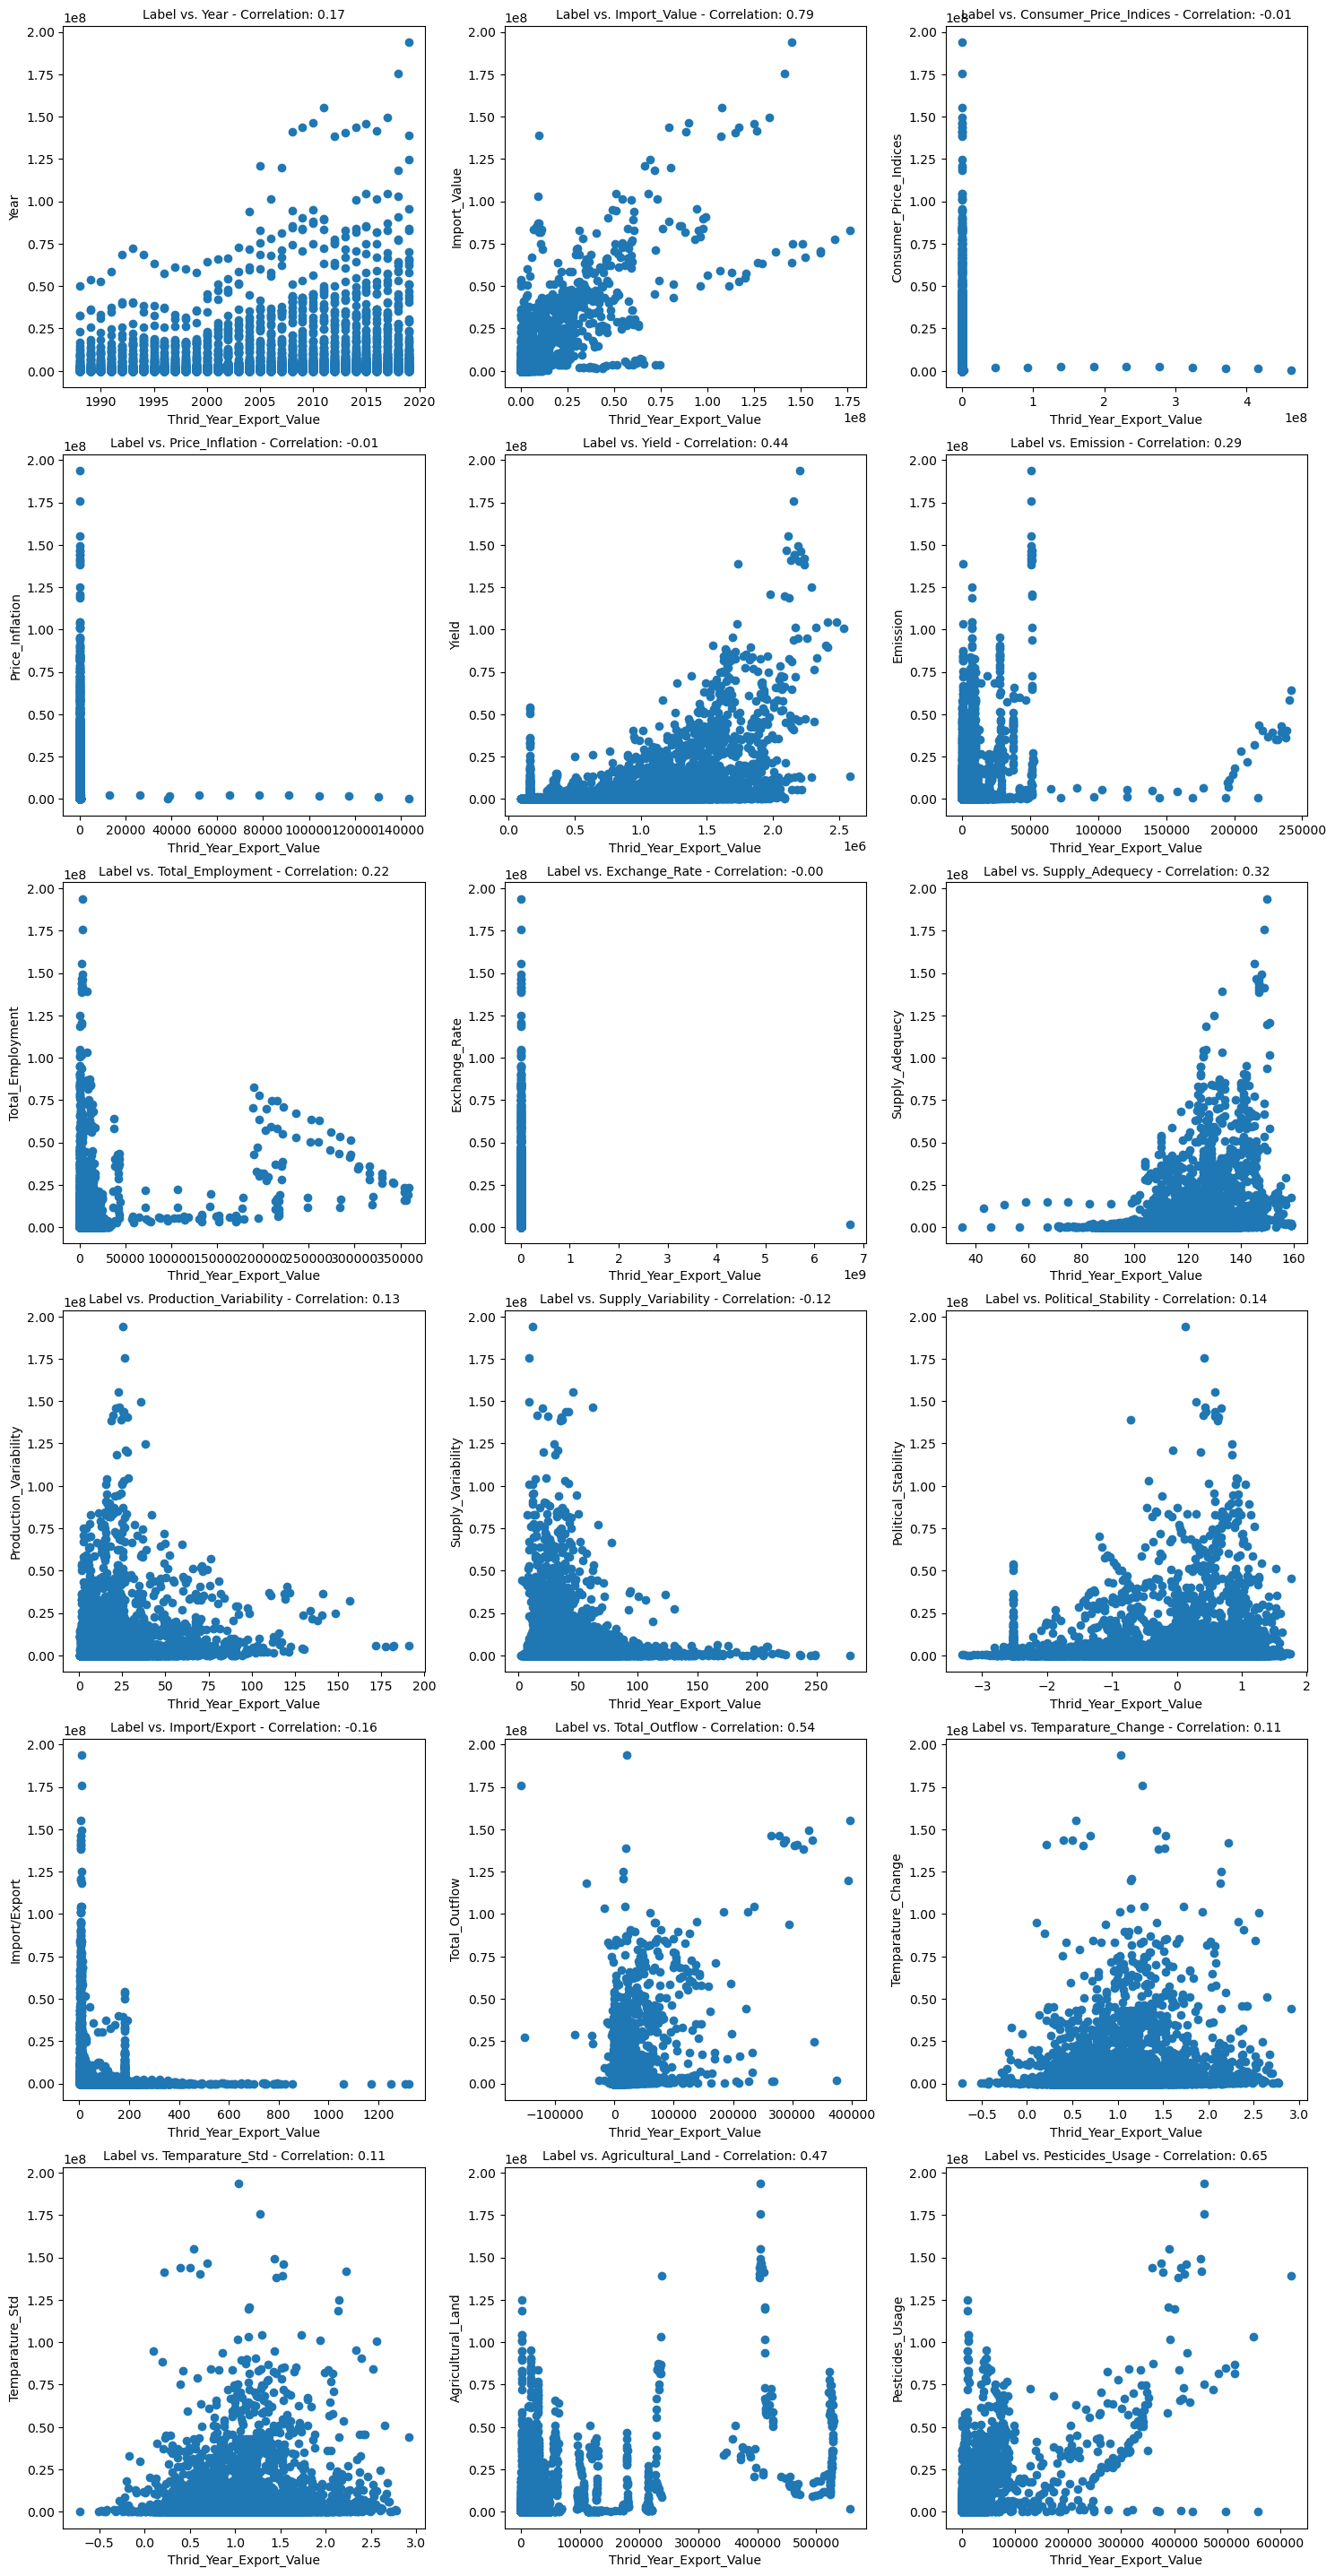

In [655]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(6, 3, figsize=(15, 30))

axes = axes.flatten()
# Iterate over the numeric columns and create scatter plots
for i, col in enumerate(features):
    if col != label:
        axes[i].scatter(labeled_df[features[i]], labeled_df[label])
        axes[i].set_ylabel(features[i])  # Use numeric_columns[i] instead of col
        axes[i].set_xlabel(label)
        axes[i].set_title(f'Label vs. {features[i]} - Correlation: {correlations.loc[features[i], label]:.2f}',fontsize=10)



# Adjust the spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('plot.png') 
plt.show()

### MODEL

In [656]:
warnings.filterwarnings("ignore")

#label encoding Area
label_encoder = LabelEncoder()

preproccesed_data  = labeled_df[correlated_features]
preproccesed_data['Area_Encoded'] = label_encoder.fit_transform(labeled_df[['Area']])

In [657]:
#normalizing the datat

scaler = StandardScaler()
final_features = correlated_features + ['Area_Encoded']
preproccesed_data[final_features] = scaler.fit_transform(preproccesed_data[final_features])

X = preproccesed_data.drop([label], axis=1)
y = preproccesed_data[label]
len(final_features)

17

In [658]:
#Defining the MLP model. This was taken and modified from lab 4 solutions
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2,hidden_dim3):
        super(MLPModel, self).__init__()
        self.hidden1 = nn.Linear(input_dim, hidden_dim1)
        self.hidden2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.hidden3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.output = nn.Linear(hidden_dim3, 1)
        self.tanh = nn.Tanh()
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        x = self.hidden1(x)
        x = self.tanh(x)
        x = self.dropout(x)
        x = self.hidden2(x)
        x = self.tanh(x)
        x = self.dropout(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output(x)
        return x
    
    def predict(self, X_test):
        X_test = torch.tensor(X_test.values, dtype=torch.float32)
        with torch.no_grad():
            y_pred = model(X_test)
        return y_pred.numpy()



    def evaluate_performance(self, y_test, y_pred):
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        print(f"Test RMSE: {rmse:.4f}, Test R^2: {r2:.4f}")


In [659]:
#the following code was taken and modified from lab 4 solutions
# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
    
# Set the hyperparameters
hidden_dim1 = 32
hidden_dim2 = 64
hidden_dim3 = 32
learning_rate = 0.0001
num_epochs = 30
batch_size = 32
    
# Convert data to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)

# Create DataLoader for mini-batch training
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = MLPModel(input_dim, hidden_dim1, hidden_dim2,hidden_dim3)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)


# Initialize variables for early stopping
best_val_loss = np.inf
patience = 5  
counter = 0 

# Training loop
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        # Forward pass
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.view(-1, 1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate on the validation set
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = criterion(y_val_pred, y_val.view(-1, 1))

    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

        # Check if validation loss has improved
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Validation loss hasn't improved for", patience, "epochs. Early stopping...")
            break
# Make predictions on the test set
y_pred = model.predict(X_test)
    
# Evaluate performance
model.evaluate_performance(y_test,y_pred)

Epoch [1/30], Training Loss: 0.0519, Validation Loss: 0.7746
Epoch [2/30], Training Loss: 0.9463, Validation Loss: 0.6385
Epoch [3/30], Training Loss: 0.1632, Validation Loss: 0.4882
Epoch [4/30], Training Loss: 1.2339, Validation Loss: 0.3687
Epoch [5/30], Training Loss: 0.7177, Validation Loss: 0.3093
Epoch [6/30], Training Loss: 0.2184, Validation Loss: 0.2791
Epoch [7/30], Training Loss: 0.1158, Validation Loss: 0.2619
Epoch [8/30], Training Loss: 0.9953, Validation Loss: 0.2491
Epoch [9/30], Training Loss: 0.0345, Validation Loss: 0.2388
Epoch [10/30], Training Loss: 1.4061, Validation Loss: 0.2313
Epoch [11/30], Training Loss: 0.0141, Validation Loss: 0.2253
Epoch [12/30], Training Loss: 6.0468, Validation Loss: 0.2209
Epoch [13/30], Training Loss: 1.4540, Validation Loss: 0.2184
Epoch [14/30], Training Loss: 0.0396, Validation Loss: 0.2121
Epoch [15/30], Training Loss: 0.0134, Validation Loss: 0.2123
Epoch [16/30], Training Loss: 0.4199, Validation Loss: 0.2083
Epoch [17/30], Tr

In [660]:
print(len(y_train))
print(len(y_val))
print(len(y_test))

3916
980
1224


In [661]:
#Saving the results
def get_results(y_pred,y_test, save = False):
    # Extract the mean and scale (std dev) for the target column
    mean_export_value = scaler.mean_[correlated_features.index('Thrid_Year_Export_Value')]
    std_export_value = scaler.scale_[correlated_features.index('Thrid_Year_Export_Value')]

    # Unscale the predictions
    unscaled_predictions = y_pred * std_export_value + mean_export_value
    unscaled_label = y_test * std_export_value + mean_export_value
    areas = labeled_df.loc[y_test.index, 'Area']
    years = labeled_df.loc[y_test.index, 'Year']
    
    results = pd.DataFrame({
    'Area': areas,
    'Year': years,
    'True Export Value': unscaled_label,
    'Predictied Export Value': unscaled_predictions.flatten()
    })
    if save:
        results.to_csv('277290_output.csv', index = False)
    return results

In [663]:
results = get_results(y_pred,y_test, save = True)
results

,Area,Year,True Export Value,Predictied Export Value
2317,Ghana,2009,2674755.00,1392824.50
1782,Ecuador,2014,5904355.41,2491178.25
8624,Malta,1989,51023.00,928670.25
4751,Saint Vincent and the Grenadines,2001,29139.00,900649.75
2845,Italy,1993,17009327.00,3961446.50
...,...,...,...,...
938,Cameroon,2005,810547.00,862680.00
8623,Malta,1988,52142.00,928054.25
3839,Nauru,2014,220.81,559567.00
3664,Mongolia,1993,96231.00,2389805.50
